# Fortune Medical Associates, Predicting Drug Review Results
**By Yamuna Umapathy**

## Business Understanding:

Our Stakeholder Fortune Medical Associates wants us to find the best model which predicts patient's effect after taking prescribed medication
for their health condition, if Drug had positive or negative effect after medication. 

## Dataset:

Dataset comes from UCI Machine Learning Respository, https://archive.ics.uci.edu/dataset/462/drug+review+dataset+drugs+com. The dataset provides 
patient reviews on specific drugs along with related conditions and a 10 star patient rating reflecting overall patient satisfaction. The data was obtained by online pharmaceutical review sites.

Dataset was cleaned, and has 215,000 rows and 6 important features to be used for our analysis. Features description as below:

Unnamed0(ID): Patient's File/Medical ID in Medical office (numerical)
drugName    : Name of drug prescribed (categorical)
review(text): Patient review after taking drug (categorical)
date        : Date of review entry (date)
usefulCount : Number of users who found review useful (numerical)

## Data Exploration & Cleaning:

In [37]:
# Importing all libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from wordcloud import WordCloud

import nltk
import string
import re
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.tokenize import regexp_tokenize, word_tokenize, RegexpTokenizer
from nltk import WordNetLemmatizer
from nltk.corpus import wordnet # imports WordNet
from nltk import pos_tag

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline

In [2]:
# Opening our dataset through pandas

df_train = pd.read_csv("data/drugsComTrain_raw.tsv", delimiter='\t', encoding = 'utf-8')
df_train

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,"May 20, 2012",27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,"December 14, 2009",17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,"November 3, 2015",10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,"November 27, 2016",37
...,...,...,...,...,...,...,...
161292,191035,Campral,Alcohol Dependence,"""I wrote my first report in Mid-October of 201...",10.0,"May 31, 2015",125
161293,127085,Metoclopramide,Nausea/Vomiting,"""I was given this in IV before surgey. I immed...",1.0,"November 1, 2011",34
161294,187382,Orencia,Rheumatoid Arthritis,"""Limited improvement after 4 months, developed...",2.0,"March 15, 2014",35
161295,47128,Thyroid desiccated,Underactive Thyroid,"""I&#039;ve been on thyroid medication 49 years...",10.0,"September 19, 2015",79


In [3]:
df_test = pd.read_csv("data/drugsComTest_raw.tsv", delimiter='\t', encoding = 'utf-8')
df_test.head()

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10.0,"February 28, 2012",22
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8.0,"May 17, 2009",17
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9.0,"September 29, 2017",3
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9.0,"March 5, 2017",35
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9.0,"October 22, 2015",4


In [4]:
# Concatenating our train & test datasets available from source to start EDA

df = pd.concat([df_train, df_test], axis=0, ignore_index=True)
df

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,"May 20, 2012",27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,"December 14, 2009",17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,"November 3, 2015",10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,"November 27, 2016",37
...,...,...,...,...,...,...,...
215058,159999,Tamoxifen,"Breast Cancer, Prevention","""I have taken Tamoxifen for 5 years. Side effe...",10.0,"September 13, 2014",43
215059,140714,Escitalopram,Anxiety,"""I&#039;ve been taking Lexapro (escitaploprgra...",9.0,"October 8, 2016",11
215060,130945,Levonorgestrel,Birth Control,"""I&#039;m married, 34 years old and I have no ...",8.0,"November 15, 2010",7
215061,47656,Tapentadol,Pain,"""I was prescribed Nucynta for severe neck/shou...",1.0,"November 28, 2011",20


In [5]:
# renaming column Unnamed: 0 as ID
df = df.rename(columns = {'Unnamed: 0': 'ID'})
df.columns

Index(['ID', 'drugName', 'condition', 'review', 'rating', 'date',
       'usefulCount'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215063 entries, 0 to 215062
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   ID           215063 non-null  int64  
 1   drugName     215063 non-null  object 
 2   condition    213869 non-null  object 
 3   review       215063 non-null  object 
 4   rating       215063 non-null  float64
 5   date         215063 non-null  object 
 6   usefulCount  215063 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 11.5+ MB


In [7]:
# Checking for missingness

df.isna().sum()

ID                0
drugName          0
condition      1194
review            0
rating            0
date              0
usefulCount       0
dtype: int64

Above shows column `condition` has 1194 missing values, since this is Medical field, not using Simple Imputer or other methods to fill in
info which may be risky later. Dropping rows which has missigness for `condition` which is one of the important feature in our analysis.

In [8]:
# dropping Nan's for column condition

df.dropna(subset = ['condition'], inplace=True)
df.isna().sum()

ID             0
drugName       0
condition      0
review         0
rating         0
date           0
usefulCount    0
dtype: int64

In [9]:
# checking unique values in each column except ID & review 

print(df['drugName'].value_counts(), "\n")
print(df['condition'].value_counts(), "\n")
print(df['rating'].value_counts(), "\n")
print(df['usefulCount'].value_counts())
print(df['review'][0])

drugName
Levonorgestrel                       4896
Etonogestrel                         4402
Ethinyl estradiol / norethindrone    3619
Nexplanon                            2892
Ethinyl estradiol / norgestimate     2682
                                     ... 
Hemin                                   1
Melpaque HP                             1
Cortisone                               1
Reyataz                                 1
Allergy DN PE                           1
Name: count, Length: 3667, dtype: int64 

condition
Birth Control                                   38436
Depression                                      12164
Pain                                             8245
Anxiety                                          7812
Acne                                             7435
                                                ...  
Systemic Candidiasis                                1
Wilson's Disease                                    1
unctional Gastric Disorde                    

## Data Visualization:

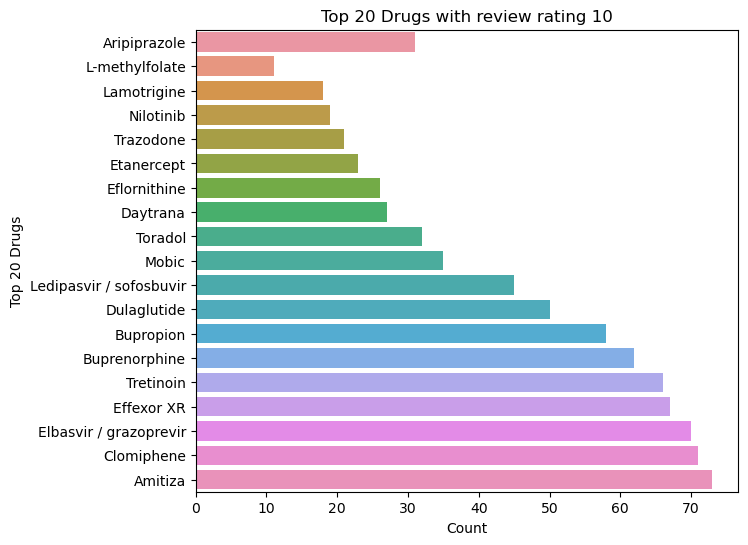

In [10]:
# Visualizing top 20 drugName based on review rating 10

top_20_drugs = df.loc[df['rating']==10,'drugName'].head(20)
plt.figure(figsize = (7,6))
sns.barplot(y=top_20_drugs.values, x=top_20_drugs.index, data=df, errorbar=None)
plt.title("Top 20 Drugs with review rating 10")
plt.ylabel("Top 20 Drugs")
plt.xlabel("Count")
plt.show()

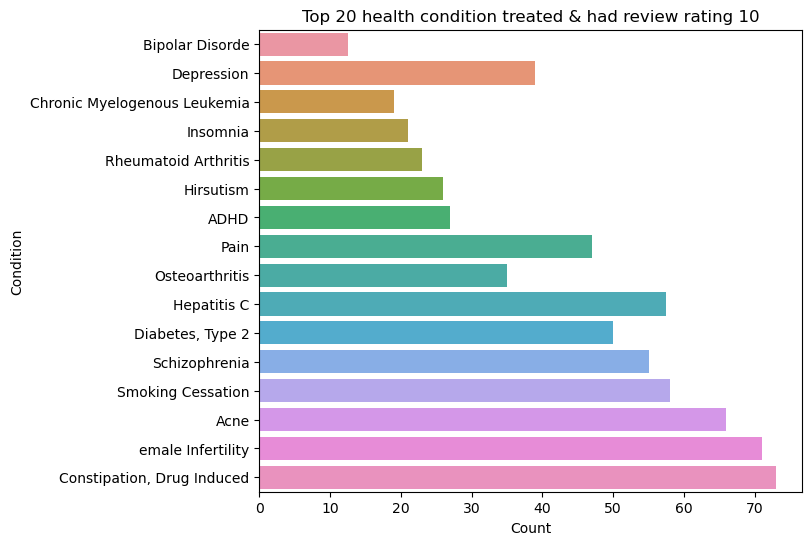

In [11]:
# Visualizing top 20 conditions based on review rating 10

top_20_condition = df.loc[df['rating']==10,'condition'].head(20)
plt.figure(figsize = (7,6))
sns.barplot(y=top_20_condition.values, x=top_20_condition.index, data=df, errorbar=None)
plt.title("Top 20 health condition treated & had review rating 10")
plt.ylabel("Condition")
plt.xlabel("Count")
plt.show()

Before starting our preprocessing steps, checking frequency of words. We are choosing column `rating` and splitting into two categories positive 
and negative. Ratings 1-5 falls under negative category, and 6-10 falls under positive category.

In [12]:
corpus = [word_tokenize(doc) for doc in df['review']]
print(corpus[0])

['``', 'It', 'has', 'no', 'side', 'effect', ',', 'I', 'take', 'it', 'in', 'combination', 'of', 'Bystolic', '5', 'Mg', 'and', 'Fish', 'Oil', "''"]


In [60]:
corpus_flat = []
for doc in corpus:
    for word in doc:
        corpus_flat.append(word.lower())
Top20words = FreqDist(corpus_flat).most_common(20)
Top20words

[('i', 1133616),
 ('.', 1128079),
 ('and', 571518),
 (',', 565559),
 ('the', 539456),
 ('to', 428354),
 ('it', 420751),
 (';', 407183),
 ('&', 399541),
 ('my', 386804),
 ('a', 382000),
 ('#', 349442),
 ('039', 348639),
 ('for', 267532),
 ('was', 234340),
 ('have', 228279),
 ('of', 227446),
 ('``', 224753),
 ("''", 202991),
 ('on', 181054)]

Looks like stopwords and punctuations are the top common words, need to preprocess column `review` for visualization. 

Let's take a look at tokens after cleaning, and keeping two sets of lists for rating 1-5 and 6-10. Cleaning the list of lists replacing punctuations with blank space, and removing blank space later. Removed numbers from tokens using regex pattern, lowercasing all tokens.

Created two list of lists as positive_corpus & negative_corpus, and flattened the list and took unique words to visualize through WordCloud.

In [13]:
# get common stop words in english that we'll remove during tokenization/text normalization
stop_words = stopwords.words('english')

# Cleaning to lowercase, removing punctuation
corpus_norm = [x for x in corpus if ((x not in stop_words))]
translator = str.maketrans('', '', string.punctuation)
corpus_norm1 = [[token.translate(translator) for token in doc] for doc in corpus_norm]
corpus_norm2 = [[token.strip() for token in doc if token.strip()] for doc in corpus_norm1]
corpus_norm3 = [[token.lower() for token in doc] for doc in corpus_norm2]

In [52]:
# Splitting corpus based on ratings, 1-5 as negative, 6-10 as positive

positive_corpus = [doc for doc, rating in zip(corpus_norm3, df['rating']) if rating > 5]
negative_corpus = [doc for doc, rating in zip(corpus_norm3, df['rating']) if rating <= 5]
positive_corpus[1]

['my',
 'son',
 'is',
 'halfway',
 'through',
 'his',
 'fourth',
 'week',
 'of',
 'intuniv',
 'we',
 'became',
 'concerned',
 'when',
 'he',
 'began',
 'this',
 'last',
 'week',
 'when',
 'he',
 'started',
 'taking',
 'the',
 'highest',
 'dose',
 'he',
 'will',
 'be',
 'on',
 'for',
 'two',
 'days',
 'he',
 'could',
 'hardly',
 'get',
 'out',
 'of',
 'bed',
 'was',
 'very',
 'cranky',
 'and',
 'slept',
 'for',
 'nearly',
 '8',
 'hours',
 'on',
 'a',
 'drive',
 'home',
 'from',
 'school',
 'vacation',
 'very',
 'unusual',
 'for',
 'him',
 'i',
 'called',
 'his',
 'doctor',
 'on',
 'monday',
 'morning',
 'and',
 'she',
 'said',
 'to',
 'stick',
 'it',
 'out',
 'a',
 'few',
 'days',
 'see',
 'how',
 'he',
 'did',
 'at',
 'school',
 'and',
 'with',
 'getting',
 'up',
 'in',
 'the',
 'morning',
 'the',
 'last',
 'two',
 'days',
 'have',
 'been',
 'problem',
 'free',
 'he',
 'is',
 'much',
 'more',
 'agreeable',
 'than',
 'ever',
 'he',
 'is',
 'less',
 'emotional',
 'a',
 'good',
 'thing',


In [55]:
# flattening the list of lists to find unique words from positive_corpus
positive_corpus_flat = []
for doc in positive_corpus:
    for word in doc:
        positive_corpus_flat.append(word)

positive_corpus_unique = set(positive_corpus_flat)

# Define a regex pattern to match numbers or words containing numbers
pattern = r'\b(\d+\w+|\w*\d+\w*)\b'

# Apply the regex pattern to filter out unwanted tokens
positive_corpus_filtered = [token for token in positive_corpus_unique if not re.match(pattern, token)]

positive_corpus_filtered[1:]

['hives',
 'opoid',
 'dantrium',
 'tirednessdizzy',
 'sh',
 'gelcaps',
 'promiscuous',
 'comalike',
 'tonics',
 'rate',
 'backdoctor',
 'drwho',
 'bn',
 'cooking',
 'seek',
 'trileptil',
 'prednisolene',
 'permenant',
 'seventytwo',
 'ruminative',
 'proffessional',
 'waay',
 'laufhing',
 'grazes',
 'medcation',
 'neutrogena',
 'gulps',
 'pry',
 'unbelieveable',
 'cscope',
 'hamstring',
 'burningthrobbing',
 'pred',
 'quillivant',
 'seraquil',
 'deteriorated',
 'allopathic',
 'eject',
 'sweetest',
 'azoles',
 'branches',
 'motions',
 'presentingspeak',
 'remembrr',
 'thyroidectomy',
 'ibm',
 'airy',
 'rambunctious',
 'sublocates',
 'eegs',
 'selfinjury',
 'resembles',
 'okla',
 'type',
 'phenfen',
 'tourniquet',
 'outside',
 'fingers',
 'anemic',
 'france',
 'rundown',
 'gosh',
 'wothdrawaling',
 'glove',
 'wipe',
 'supplier',
 'tabspercocets',
 'nowarning',
 'katrena',
 'self',
 'didint',
 'altoghether',
 'collection',
 'latestage',
 'tipsy',
 'escitilopram',
 'nsta',
 'iboprofen',
 'i

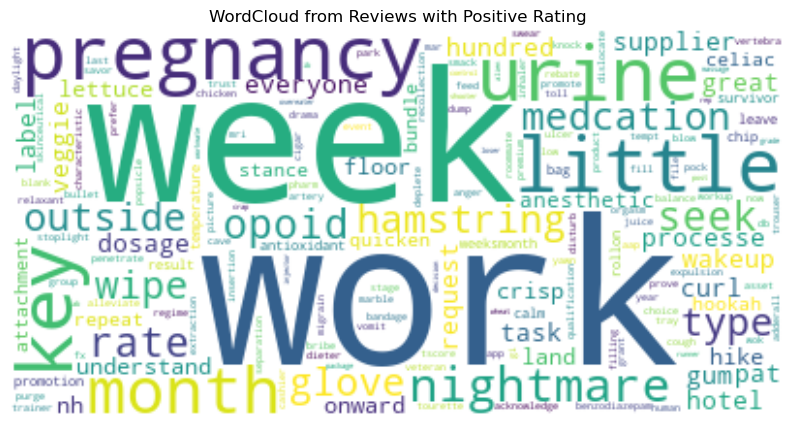

In [39]:
# Create a WordCloud object with default settings
wc = WordCloud(background_color="white")

# Generate the word cloud using your corpus
wc.generate(" ".join(positive_corpus_filtered))

# Display the word cloud
plt.figure(figsize=(10,7))
plt.imshow(wc, interpolation="bilinear")
plt.title("WordCloud from Reviews with Positive Rating")
plt.axis("off")
plt.show()

In [56]:
# flattening list of lists, and create unique tokens from negative_corpus

negative_corpus_flat = []
for doc in negative_corpus:
    for word in doc:
        negative_corpus_flat.append(word)

negative_corpus_unique = set(negative_corpus_flat)

# Define a regex pattern to match numbers or words containing numbers
pattern = r'\b(\d+\w+|\w*\d+\w*)\b'

# Apply the regex pattern to filter out unwanted tokens
negative_corpus_filtered = [token for token in negative_corpus_unique if not re.match(pattern, token)]

negative_corpus_filtered[1:]

['pancreatitus',
 'sh',
 'micardishctz',
 'ranbaxy',
 'reglanbenedryl',
 'rate',
 'cooking',
 'seek',
 'noth',
 'neutrogena',
 'gulps',
 'pry',
 'unbelieveable',
 'hamstring',
 'pred',
 'quillivant',
 'deteriorated',
 'allopathic',
 'sweetest',
 'arems',
 'motions',
 'ibm',
 'thyroidectomy',
 'salvageable',
 'eegs',
 'resembles',
 'type',
 'phenfen',
 'kleenexes',
 'eles',
 'outside',
 'fingers',
 'anemic',
 'rundown',
 'france',
 'gosh',
 'wipe',
 'supplier',
 'nowarning',
 'self',
 'alrighty',
 'anymovement',
 'activties',
 'collection',
 'tamasulosin',
 'tipsy',
 'combs',
 'iboprofen',
 'ibuprofens',
 'events',
 'loasartan',
 'inclined',
 'geno',
 'kindly',
 'dupixient',
 'highly',
 'tapped',
 'hundred',
 'laryngoscopy',
 'qhs',
 'pharyngeal',
 'gum',
 'injustice',
 'ppdppa',
 'importantly',
 'curl',
 'alparzolam',
 'antiboitics',
 'napa',
 'incrementing',
 'task',
 'medicationwithin',
 'thisss',
 'claimsresults',
 'promising',
 'frightens',
 'zzzquil',
 'inflam',
 'enduce',
 'great

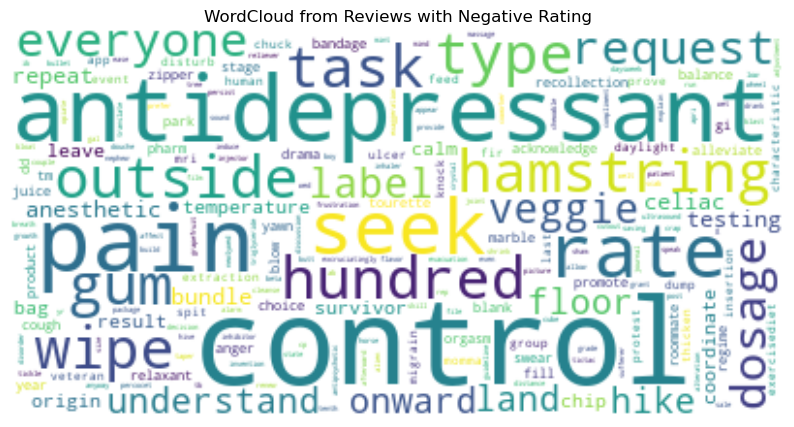

In [41]:
# Create a WordCloud object with default settings
wc = WordCloud(background_color="white")

# Generate the word cloud using your corpus
wc.generate(" ".join(negative_corpus_filtered))

# Display the word cloud
plt.figure(figsize=(10,7))
plt.imshow(wc, interpolation="bilinear")
plt.title("WordCloud from Reviews with Negative Rating")
plt.axis("off")
plt.show()

## Preprocessing:

**Target Variable `rating`**

Implementing TextPreprocessor calling class function, following cleaning process will be completed: Lowercasing, Tokenizing and removing
stopwords, Tagging POS and Lemmatizing. 

In [69]:
# class function for preprocessing

class TextPreprocessor(BaseEstimator, TransformerMixin):
    
    def __init__(self):
        
        #define attributes to store if text preprocessing requires fitting from data
        pass
    
    def fit(self, data, y = 0):
        # this is where you would fit things like corpus specific stopwords
        # fit probable bigrams with bigram model in here
        
        # save as parameters of Text preprocessor
        return self
    
    def transform(self, data, y = 0):
        fully_normalized_corpus = [self.process_doc(doc) for doc in data]
        
        return fully_normalized_corpus
        
    
    def process_doc(self, doc):

        #initialize lemmatizer
        wnl = WordNetLemmatizer()
        stop_words = stopwords.words('english')
        
        # helper function to change nltk's part of speech tagging to a wordnet format.
        def pos_tagger(nltk_tag):
            if nltk_tag.startswith('J'):
                return wordnet.ADJ
            elif nltk_tag.startswith('V'):
                return wordnet.VERB
            elif nltk_tag.startswith('N'):
                return wordnet.NOUN
            elif nltk_tag.startswith('R'):
                return wordnet.ADV
            else:         
                return None


        # remove stop words and punctuations, then lower case
        doc_norm = [tok.lower() for tok in word_tokenize(doc) if ((tok.isalpha()) & (tok not in stop_words)) ]

        #  POS detection on the result will be important in telling Wordnet's lemmatizer how to lemmatize

        # creates list of tuples with tokens and POS tags in wordnet format
        wordnet_tagged = list(map(lambda x: (x[0], pos_tagger(x[1])), pos_tag(doc_norm))) 
        doc_norm = [wnl.lemmatize(token, pos) for token, pos in wordnet_tagged if pos is not None]

        return " ".join(doc_norm)